In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from google.colab import files

uploaded = files.upload()


Saving honeyproduction 1998-2021.csv to honeyproduction 1998-2021.csv


In [12]:
import io

df = pd.read_csv(io.BytesIO(uploaded['honeyproduction 1998-2021.csv']))
print(df)

             State    numcol  yieldpercol   totalprod      stocks  priceperlb  \
0          Alabama   16000.0           71   1136000.0    159000.0        0.72   
1          Arizona   55000.0           60   3300000.0   1485000.0        0.64   
2         Arkansas   53000.0           65   3445000.0   1688000.0        0.59   
3       California  450000.0           83  37350000.0  12326000.0        0.62   
4         Colorado   27000.0           72   1944000.0   1594000.0        0.70   
..             ...       ...          ...         ...         ...         ...   
980       Virginia    6000.0           40    240000.0     79000.0        8.23   
981     Washington   96000.0           32   3072000.0   1206000.0        2.52   
982  West Virginia    6000.0           43    258000.0    136000.0        4.80   
983      Wisconsin   42000.0           47   1974000.0    750000.0        2.81   
984        Wyoming   38000.0           58   2204000.0    242000.0        2.07   

      prodvalue  year  
0  

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   State        985 non-null    object 
 1   numcol       985 non-null    float64
 2   yieldpercol  985 non-null    int64  
 3   totalprod    985 non-null    float64
 4   stocks       985 non-null    float64
 5   priceperlb   985 non-null    float64
 6   prodvalue    985 non-null    float64
 7   year         985 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 61.7+ KB


In [14]:
df.isnull().sum()

State          0
numcol         0
yieldpercol    0
totalprod      0
stocks         0
priceperlb     0
prodvalue      0
year           0
dtype: int64

In [15]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
State,985,44,Alabama,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
numcol,985.0,NaN,NaN,NaN,62892.385787,94163.791917,2000.0,9000.0,26000.0,68000.0,530000.0
yieldpercol,985.0,NaN,NaN,NaN,58.40203,19.291695,3.0,45.0,55.0,70.0,136.0
totalprod,985.0,NaN,NaN,NaN,4035131.979695,6752289.667882,84000.0,469000.0,1488000.0,3780000.0,46410000.0
stocks,985.0,NaN,NaN,NaN,1167186.80203,2088588.60706,8000.0,108000.0,360000.0,1217000.0,13800000.0
priceperlb,985.0,NaN,NaN,NaN,1.969594,1.177922,0.49,1.2,1.7,2.36,8.23
prodvalue,985.0,NaN,NaN,NaN,5939910.659898,9806594.833674,162000.0,1037000.0,2409000.0,5897000.0,83859000.0
year,985.0,NaN,NaN,NaN,2009.291371,6.962251,1998.0,2003.0,2009.0,2015.0,2021.0


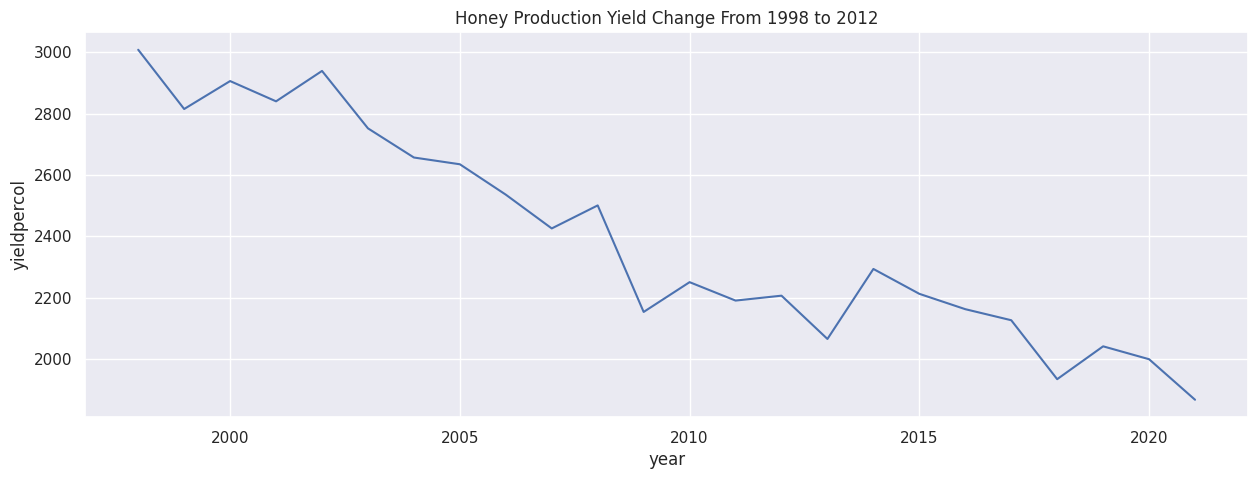

In [70]:
yield_change = df.groupby(['year'], as_index=False)['yieldpercol'].sum().sort_values(by='yieldpercol', ascending=False)

fig = plt.subplots(figsize= (15, 5))

sns.lineplot(x = 'year',y= 'yieldpercol' ,data = yield_change).set(title='Honey Production Yield Change From 1998 to 2012')
plt.show()

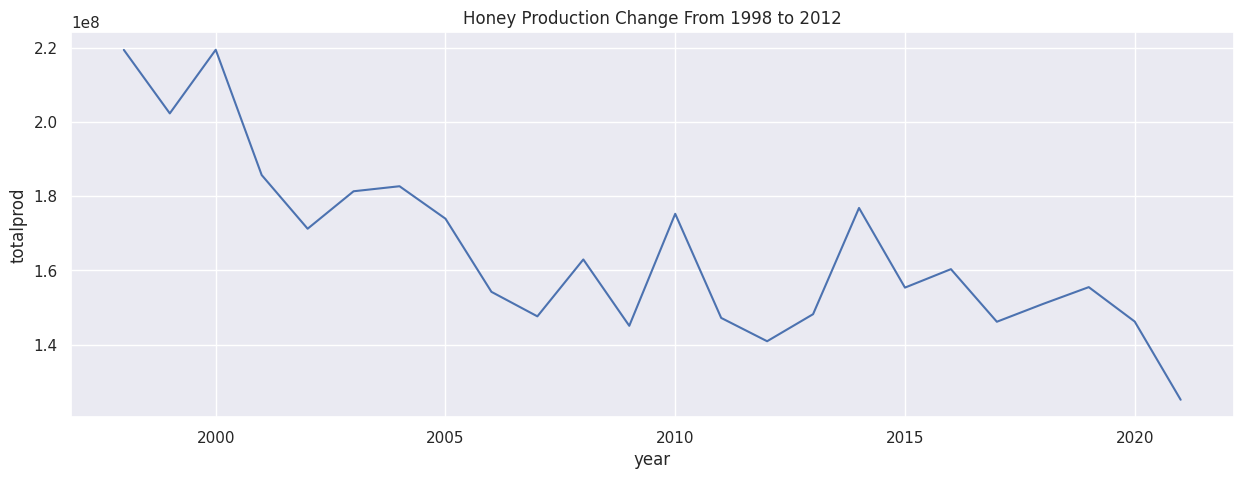

In [69]:
Production_change = df.groupby(['year'], as_index=False)['totalprod'].sum().sort_values(by='totalprod', ascending=False)

fig = plt.subplots(figsize= (15, 5))

sns.lineplot(x = 'year',y= 'totalprod' ,data = Production_change).set(title='Honey Production Change From 1998 to 2012')
plt.show()

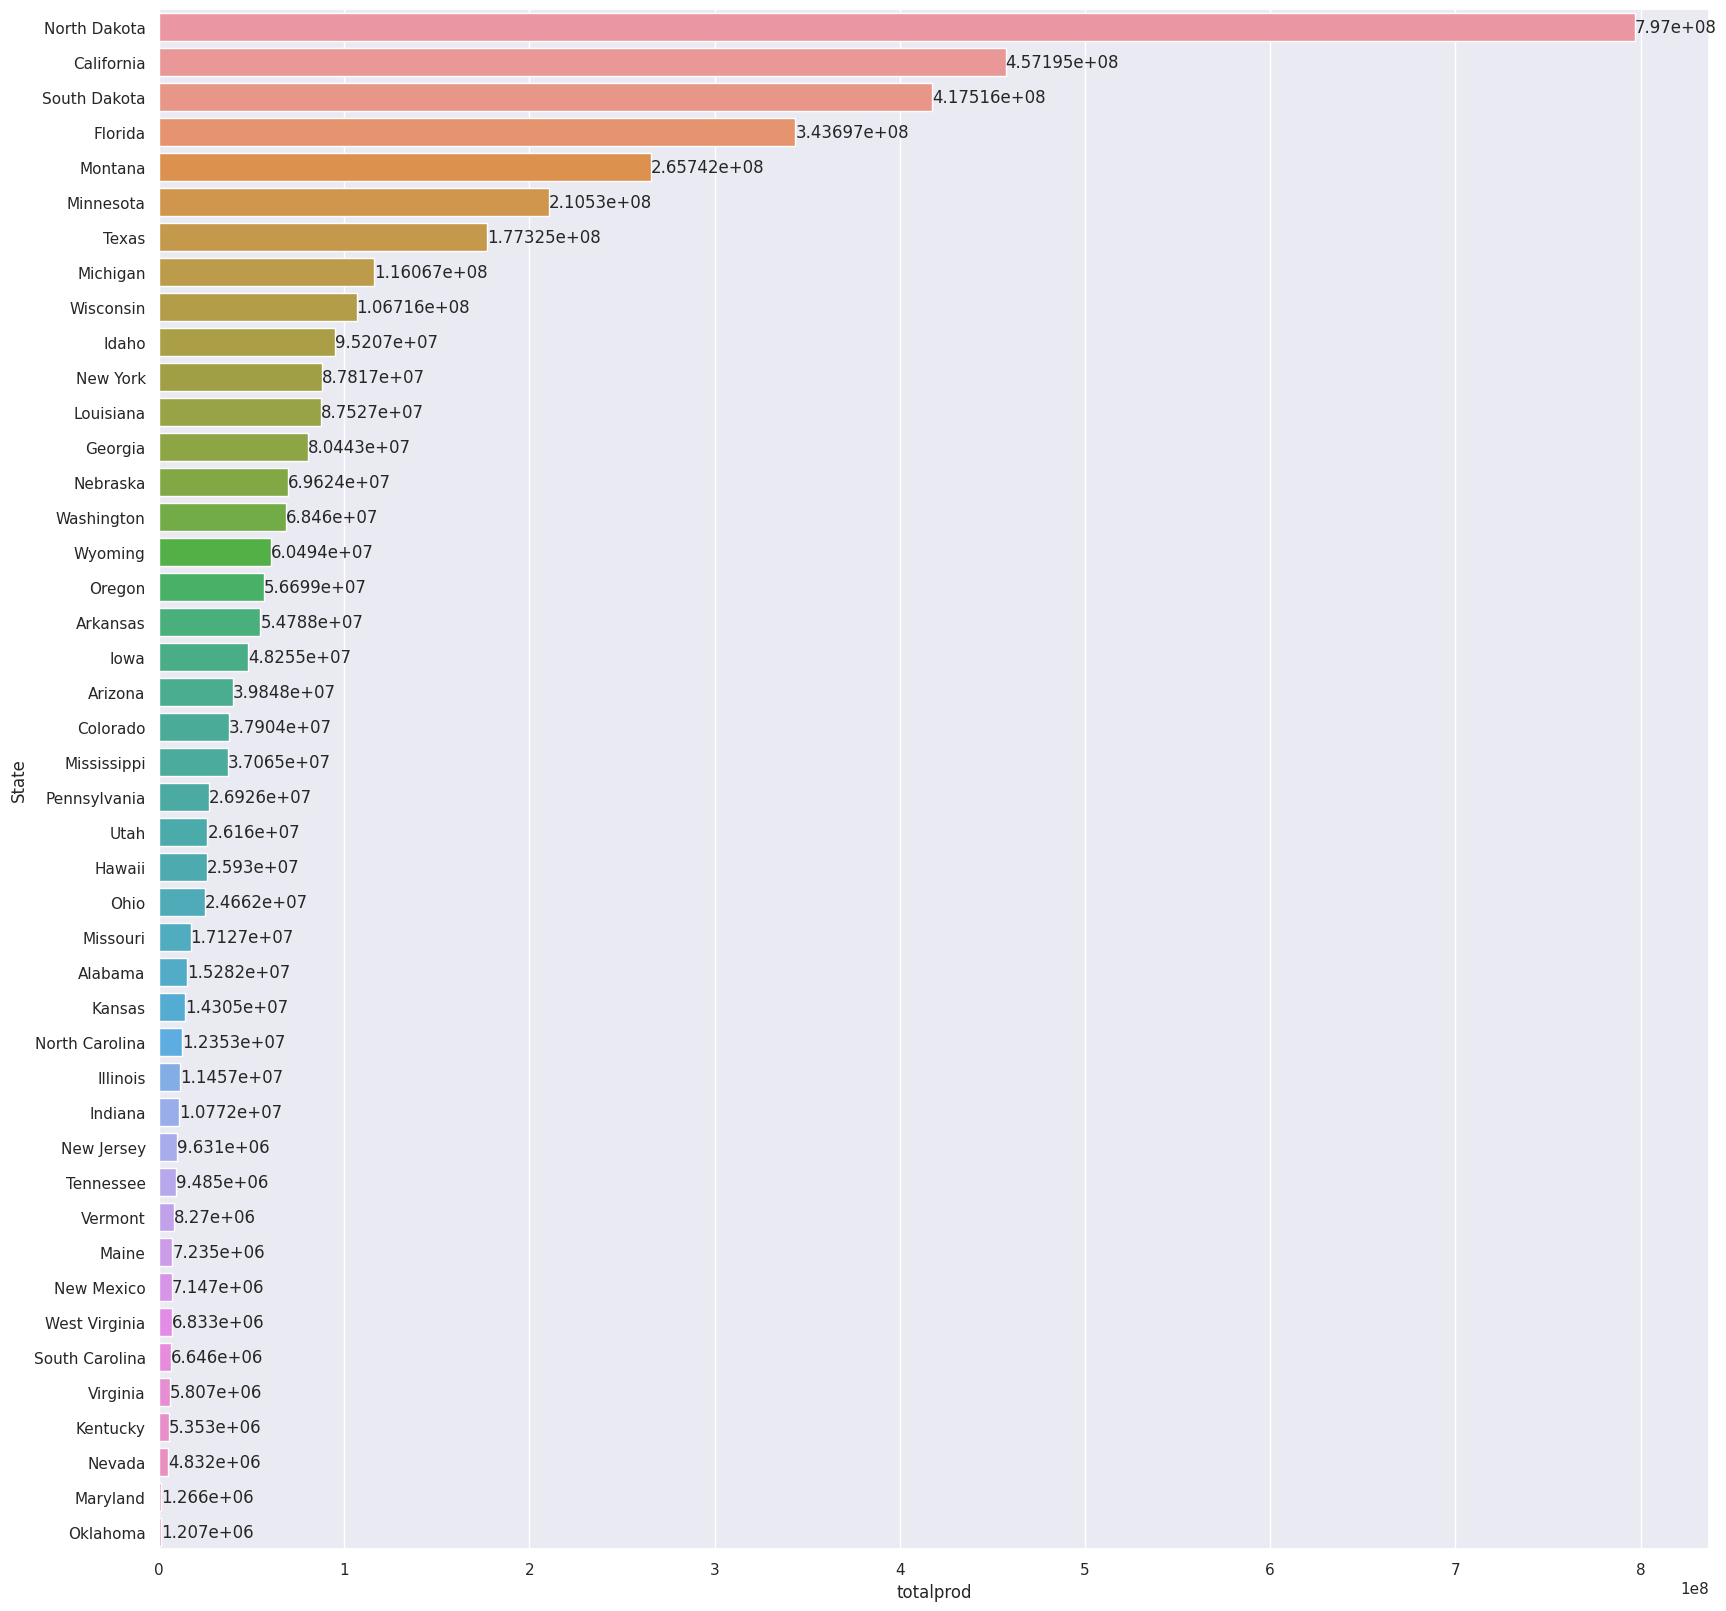

In [66]:

sales_state = df.groupby(['State'], as_index=False)['totalprod'].sum().sort_values(by='totalprod', ascending=False)

sns.set(rc={'figure.figsize':(20,20)})
ax = sns.barplot(data = sales_state, x = 'totalprod',y= 'State')

for bars in ax.containers:
    ax.bar_label(bars)

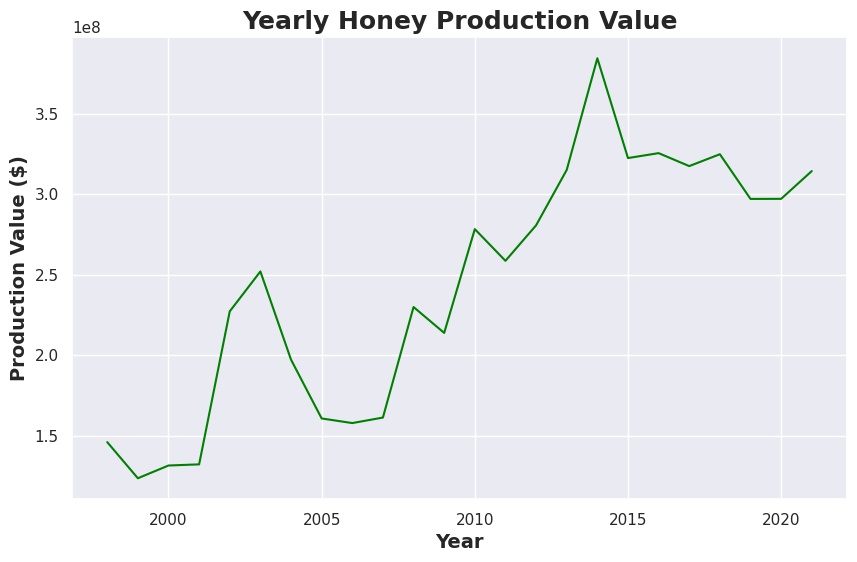

In [67]:
yearly_prodvalue = df.groupby('year')['prodvalue'].sum()


fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(yearly_prodvalue.index, yearly_prodvalue.values, color='green')


ax.set_title('Yearly Honey Production Value', fontweight='bold', fontsize=18)
ax.set_xlabel('Year', fontweight='bold', fontsize=14)
ax.set_ylabel('Production Value ($)', fontweight='bold', fontsize=14)


plt.show()

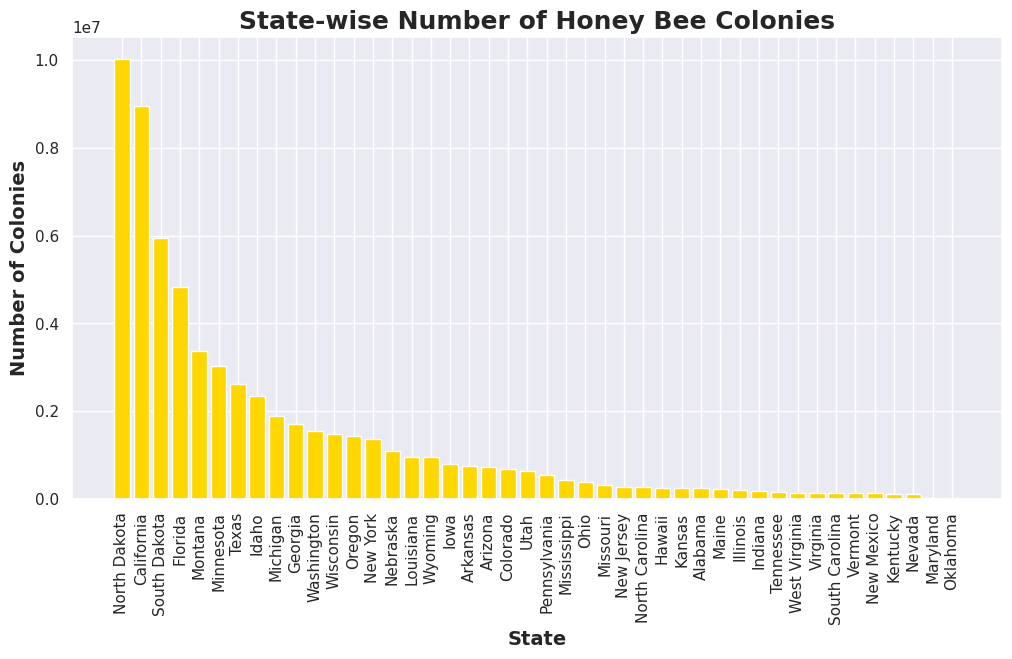

In [72]:
colonies_by_state = df.groupby('State')['numcol'].sum()

colonies_by_state = colonies_by_state.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12,6))
plt.bar(colonies_by_state.index, colonies_by_state.values, color='gold')

# Add labels and title
plt.xlabel('State', fontsize=14, fontweight='bold')
plt.ylabel('Number of Colonies', fontsize=14, fontweight='bold')
plt.title('State-wise Number of Honey Bee Colonies', fontsize=18, fontweight='bold')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

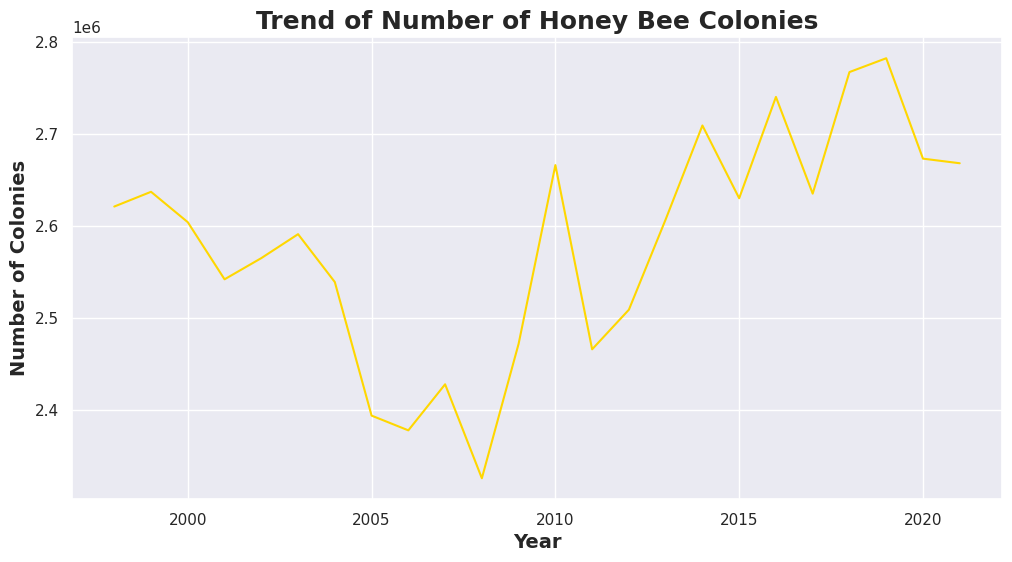

In [74]:
colonies_by_year = df.groupby('year')['numcol'].sum()
plt.figure(figsize=(12,6))
plt.plot(colonies_by_year.index, colonies_by_year.values, color='gold')

plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Number of Colonies', fontsize=14, fontweight='bold')
plt.title('Trend of Number of Honey Bee Colonies', fontsize=18, fontweight='bold')

plt.show()